# Business Case Prático - Netflix

**Introdução**

A Netflix surgiu em 1997, tendo sua primeira loja inaugurada em 1998 com 30 funcionários e 925 títulos disponíveis, quase todo o catálogo em DVD da época. Hoje, a netflix é conhecida hoje pelo serviço de streaming por assinatura que permite assistir a séries e filmes sem comerciais.   

O grande crescimento da Netflix é buscado por diversas empresas que tem como inovação um de seus direcionadores. Em um artigo no LinkedIn, o ex-funcionário Barry Enderwick, que trabalhou por 11 anos na área de marketing da companhia, compartilhou algumas lições que podem ser aprendidas com a empresa. Segundo Enderwick, o seu sucesso é uma combinação de decisões inteligentes baseadas em estratégia. 

Um exemplo das estratégias inteligentes da Netflix é o bom uso de Big Data. A marca usa algoritmos não apenas para sugerir filmes e séries, mas também para criar propagandas personalizadas. Dependendo do perfil do usuário, eles exibem uma prévia diferente para atrair a atenção de acordo com o gosto. Por exemplo: na estreia de House of Cards, a empresa criou 10 trailers distintos para direcionar para cada perfil de público.

Já imaginou fazer parte desse time? Nesse desafio, você está convidado para navegar  ssssss utilizar os dados fornecidos pela equipe para trazer informações valiosas para o negócio. Aproveite essa oportunidade para mostrar ao máximo suas competências técnicas e de negócio, e consequentemente, fazer os olhos dos diretores brilharem.!


Fontes:
https://www.linkedin.com/pulse/how-copy-netflix-barry-enderwick/
https://ecommercedesucesso.com.br/caso-de-sucesso-netflix


[image.png](attachment:image.png)


**Problema de Negócio**

O time de produtos da empresa deseja aprimorar suas estratégias e para isso, ele conta com a sua ajuda para entender uma lista de filmes lançados nos últimos anos.  

O seu objetivo será realizar análises nos dados com o objetivo de entender de forma aprofundada as características dos filmes e a distribuição das avaliações do IMBD.  

No final do projeto você deverá entregar o relatório (em Jupyter Notebook) com tudo o que foi descoberto em relação aos dados fornecidos e informar a equipe sobre os padrões encontrados e as principais dos filmes desse período.  

Lembre-se que as visualizações vão te ajudar a defender suas observações, utilize os gráficos que você mais considerar interessante para as análises.

**Etapas**

**1. Exercícios do módulo de Análise de Dados com Python:** nos exercícios você irá aplicar tudo aprendido em sala de aula nas bases de dados desse projeto. Aproveite para tirar dúvidas sobre a linguagem, funções e possíveis comandos. (Aulas 3 e 4)


**2. Hipóteses e perguntas:** faça provocação em relação aos dados e gere uma lista de perguntas e que você gostaria de responder com esses dados. Aplique o conhecimento de aula para responder à essas perguntas. (Aula 5 e 6)  
    - Exemplo: Será que filmes de terror possuem avaliações inferiores a documentários?  

**3. Relatório com suas análises:** nessa etapa você irá utilizar gráficos e tabelas para responder as provocações da etapa 2. (Aula 8)   
    - Exemplo: Um gráfico comparando as avaliações dos filmes por gênero. 

**Sobre os Dados**

O time de engenharia de dados consolidou informações extraídas do sistema que serão interessantes para a resolução desse problema. Pela urgência da demanda, antes que o time de governança de dados pudesse qualificá-los, o time separou uma amostra referente a cada conjunto de dados extraídos para que você comece as análises. Você deve identificar uma forma de unificar as essas amostras e assim, extrair mais informações do conjunto.

Você receberá duas amostras similares. Os filmes que precisam ser analisados estão na primeira amostra. A segunda, é uma lista mais completa, com mais filmes e mais informações. Aproveite para combiná-las e agregar ainda mais valor aos seus estudos.


*Amostra 1*  
Title        - Título  
Genre        - Gênero(s)  
Premiere     - Data de Lançamento  
Runtime      - Tempo de Duração  
IMDB Score   - Avaliação IMBD  
Language     - Idioma  

*Amostra 2*  
Show Id              - Identificador  
Title                - Título  
Description          - Descrição  
Director             - Diretor  
Genres               - Gênero(s)  
Cast                 - Elenco  
Production Country   - País de Produção  
Release Date         - Data de Lançamento  
Rating               - Tipo de Avaliação  
Duration             - Tempo de Duração  
Imdb Score           - Avaliação IMBD  
Content Type         - Tipo  
Date Added           - Data de adição  



# Fixação do conteúdo

In [118]:
# Bibliotecas

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Exibição de até 100 colunas do dataframe
pd.set_option("display.max_rows",100)

Leitura da base "NetflixOriginals", em formato CSV

In [2]:
path = "C:/Users/bruna.caveion/Accenture/Future Lab Team - Tech - Tech/4. Data Science Training/treinamento LB/"
file = "NetflixOriginals.csv"
originals = pd.read_csv(path+file, sep=',')
originals

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81.0,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79.0,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94.0,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90.0,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125.0,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153.0,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese


## Exercícios Práticos Aula 3: Pandas I

Qual é o tamanho desse dataframe? Utilize ".shape" para saber a quantidade de linhas e colunas

In [3]:
originals.shape

(584, 6)

Verificação do Cabeçalho do Data Frame (5 primeiras linhas) com ".head()"

In [4]:
originals.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81.0,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79.0,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94.0,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90.0,3.4,Hindi


Verificação do Final do Data Frame (5 últimas linhas) com ".tail()"

In [38]:
originals.tail()

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125.0,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153.0,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83.0,9,English


Altere o nome da coluna "IMDB Score" para "IMDB_Score

In [39]:
originals = originals.rename(columns={"IMDB Score":"IMDB_Score"})
originals

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81.0,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79.0,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94.0,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90.0,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125.0,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153.0,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese


Verifique os tipos das colunas do dataframe e se existem valores faltantes com ".info()"

In [40]:
originals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    float64
 4   IMDB_Score  584 non-null    object 
 5   Language    549 non-null    object 
dtypes: float64(1), object(5)
memory usage: 27.5+ KB


Utilize o método ".describe()" para verificar algumas métricas das colunas numéricas do dataframe

In [41]:
originals.describe()

,Runtime
count,584.000000
mean,89.688014
std,33.214736
min,4.000000
25%,83.000000
50%,97.000000
75%,107.000000
max,209.000000


Nota: Você sabe o que significa cada uma dessas métricas? Você irá verificar com detalhes na aula 5: Data Mining 

Agora utilize o método ".describe()" para verificar algumas métricas das colunas categóricas do dataframe. Para esse passo é necessário utilizar o parâmetro "include"

In [42]:
originals.describe(include='all')

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
count,584,584,584,584.000000,584,549
unique,584,142,402,NaN,61,37
top,Sturgill Simpson Presents: Sound & Fury,Documentary,"October 2, 2020",NaN,6.3,English
freq,1,138,6,NaN,30,373
mean,NaN,NaN,NaN,89.688014,NaN,NaN
std,NaN,NaN,NaN,33.214736,NaN,NaN
min,NaN,NaN,NaN,4.000000,NaN,NaN
25%,NaN,NaN,NaN,83.000000,NaN,NaN
50%,NaN,NaN,NaN,97.000000,NaN,NaN
75%,NaN,NaN,NaN,107.000000,NaN,NaN


Exiba as 5 primeiras linhas apenas da Coluna "Genre"

A) ...utilizando "head()" e o acesso à coluna.

In [44]:
originals["Genre"].head()

0              Documentary
1                 Thriller
2    Science fiction/Drama
3          Horror thriller
4                  Mystery
Name: Genre, dtype: object

B) ...utilizando ".iloc()"

In [45]:
originals.iloc[:3,1]

0              Documentary
1                 Thriller
2    Science fiction/Drama
Name: Genre, dtype: object

C) ...utilizando ".loc()"

In [46]:
originals.loc[:3,'Genre']
#################### vai até o "nome do indice" diferente do iloc que pega os 3 primeiros

0              Documentary
1                 Thriller
2    Science fiction/Drama
3          Horror thriller
Name: Genre, dtype: object

Exiba as 5 últimas linhas de apenas 3 colunas à sua escolha.

In [47]:
originals.iloc[:, 1:4].tail()

,Genre,Premiere,Runtime
579,Concert Film,"December 31, 2018",125.0
580,Documentary,"October 9, 2015",91.0
581,One-man show,"December 16, 2018",153.0
582,Documentary,"December 8, 2020",89.0
583,Documentary,"October 4, 2020",83.0


Filtre apenas linhas em que o gênero seja igual a documentário: "Genre" == "Documentary"

In [48]:
originals[originals["Genre"]=="Documentary"]

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese
10,Searching for Sheela,Documentary,"April 22, 2021",58.0,4.1,English
15,After the Raid,Documentary,"December 19, 2019",25.0,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64.0,4.4,English
30,After Maria,Documentary,"May 24, 2019",37.0,4.6,English/Spanish
...,...,...,...,...,...,...
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109.0,8.2,Spanish
577,Dancing with the Birds,Documentary,"October 23, 2019",51.0,8.3,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese


Filtre as linhas em que o gênero seja igual a documentário OU suspense:  
"Genre" == "Documentary" | "Genre" == "Thriller"

In [49]:
originals[(originals["Genre"]=="Documentary")|(originals["Genre"]=="Thriller")]

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81.0,2.6,Spanish
10,Searching for Sheela,Documentary,"April 22, 2021",58.0,4.1,English
14,Mercy,Thriller,"November 22, 2016",90.0,4.2,English
15,After the Raid,Documentary,"December 19, 2019",25.0,4.3,Spanish
...,...,...,...,...,...,...
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109.0,8.2,Spanish
577,Dancing with the Birds,Documentary,"October 23, 2019",51.0,8.3,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese


Filtre as linhas em que o gênero seja igual a documentário e que o idioma seja inglês:  
"Genre" == "Documentary" | "Language" == "English"

In [50]:
originals[(originals["Genre"]=="Documentary")&(originals["Language"]=="English")]

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
10,Searching for Sheela,Documentary,"April 22, 2021",58.0,4.1,English
20,"Hello Privilege. It's Me, Chelsea",Documentary,"September 13, 2019",64.0,4.4,English
80,"Strip Down, Rise Up",Documentary,"February 5, 2021",112.0,5.2,English
111,Ghosts of Sugar Land,Documentary,October 16. 2019,21.0,5.5,English
199,Notes from Dunblane: Lesson from a School Shoo...,Documentary,"September 28, 2018",23.0,5.9,English
...,...,...,...,...,...,...
571,13th,Documentary,"October 7, 2016",100.0,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,"June 19, 2020",107.0,8.2,English
574,Seaspiracy,Documentary,"March 24, 2021",89.0,8.2,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51.0,8.3,English


## Exercícios Práticos Aula 4: Pandas II

Utilize o método ".value_counts()" para visualizar a frequência de idioma na base. (Coluna "Language")

In [51]:
originals["Language"].value_counts()

English                       373
Hindi                          33
Spanish                        29
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Korean                          5
English/Spanish                 5
Japanese                        5
German                          5
Turkish                         4
Dutch                           3
Marathi                         3
Polish                          3
English/Mandarin                2
Thai                            2
English/Japanese                2
Filipino                        2
English/Ukranian/Russian        1
Norwegian                       1
Khmer/English/French            1
English/Arabic                  1
Malay                           1
Georgian                        1
Swedish                         1
Bengali                         1
English/Russian                 1
Thia/English                    1
English/Akan  

Utilize o método ".mean()" para obter a média de duração dos filmes. (Coluna "Runtime")

In [52]:
originals["Runtime"].mean()

89.68801369863012

Utilize o método ".mean()" para obter a média de duração do score dos filmes (Colunas "Runtime" e "IMDB_Score")

In [53]:
lista_colunas = ["Runtime", "IMDB_Score"]
originals[lista_colunas].mean()

Runtime    89.688014
dtype: float64

Verifique a quantidade de gêneros distintos que há no dataframe. Utilize "nunique()"

In [54]:
originals["Genre"].nunique()

142

Exiba a lista de gêneros distintos em ordem alfabética. Utilize os métodos "unique()" e "set()"

In [55]:
genero = originals["Genre"].unique()
genero_ordenado = sorted(genero)
genero_ordenado

[' 2015"',
 ' 2017"',
 ' 2018"',
 ' 2019"',
 ' 2020"',
 ' 2021"',
 'Action',
 'Action comedy',
 'Action thriller',
 'Action-adventure',
 'Action-thriller',
 'Action/Comedy',
 'Action/Science fiction',
 'Adventure',
 'Adventure-romance',
 'Adventure/Comedy',
 'Aftershow / Interview',
 'Animated musical comedy',
 'Animation',
 'Animation / Comedy',
 'Animation / Musicial',
 'Animation / Science Fiction',
 'Animation / Short',
 'Animation/Christmas/Comedy/Adventure',
 'Animation/Comedy/Adventure',
 'Animation/Musical/Adventure',
 'Animation/Superhero',
 'Anime / Short',
 'Anime/Fantasy',
 'Anime/Science fiction',
 'Anthology/Dark comedy',
 'April 12, 2019',
 'April 14, 2021',
 'April 17, 2019',
 'April 9, 2021',
 'August 10, 2018',
 'August 21, 2019',
 'Biographical/Comedy',
 'Biopic',
 'Black comedy',
 'Christian musical',
 'Christmas comedy',
 'Christmas musical',
 'Christmas/Fantasy/Adventure/Comedy',
 'Comedy',
 'Comedy / Musical',
 'Comedy horror',
 'Comedy mystery',
 'Comedy-drama',

Nota: Como você pode perceber, existem gêneros que se repetem com uma pequena variação na nomenclatura.

**Espaço para realizar a deduplicação dos gêneros**

In [123]:
originals["Genre"].drop_duplicates().head(40)

0                    Documentary
1                       Thriller
2          Science fiction/Drama
3                Horror thriller
4                        Mystery
5                         Action
6                         Comedy
7            Heist film/Thriller
8        Musical/Western/Fantasy
11                         Drama
12               Romantic comedy
13                 Action comedy
16              Horror anthology
17            Political thriller
18               January 1, 2021
24              Superhero-Comedy
31                        Horror
32                 Romance drama
40                 Anime / Short
42                     Superhero
44                         Heist
49                       Western
51           Animation/Superhero
52                   Family film
55               Action-thriller
62             Teen comedy-drama
63                Romantic drama
64                     Animation
66               August 21, 2019
68             Christmas musical
76     Sci

In [129]:
###### colocar .str em séries de df
### transformação para lista antes era objeto
lista_genero = originals["Genre"].str.split("/")

In [131]:
#### pegamos a primeira coluna da lista
lista_genero.str[0]

0          Documentary
1             Thriller
2      Science fiction
3      Horror thriller
4              Mystery
            ...       
579       Concert Film
580        Documentary
581       One-man show
582        Documentary
583        Documentary
Name: Genre, Length: 584, dtype: object

In [135]:
###### criação da coluna lista
originals["list_genre"] = originals["Genre"].str.split("/")

In [138]:
df_explodido = originals.explode("list_genre")

In [143]:
originals["Genre"].value_counts()

Documentary            138
Drama                   75
Comedy                  47
Romantic comedy         38
Thriller                33
                      ... 
July 8, 2020             1
Animation / Comedy       1
Biographical/Comedy      1
Mentalism special        1
Action/Comedy            1
Name: Genre, Length: 142, dtype: int64

In [146]:
df_explodido["list_genre"].str.strip().str.lower().value_counts()

documentary                     138
drama                            79
comedy                           58
romantic comedy                  39
thriller                         38
                               ... 
september 12, 2017                1
psychological thriller drama      1
biographical                      1
romance drama                     1
april 12, 2019                    1
Name: list_genre, Length: 118, dtype: int64

Verifique se existe linhas duplicadas. Quantas são?

In [147]:
originals.info()
######## não existem duplicatas, pois a função info & shape disse que existem 142 gêneros, que é o igual depois de drop_duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    float64
 4   IMDB_Score  584 non-null    object 
 5   Language    584 non-null    object 
 6   list_genre  584 non-null    object 
dtypes: float64(1), object(6)
memory usage: 32.1+ KB


Selecione apenas as colunas de Título e Gênero e verifique novamente se existe linhas duplicadas. Quantas são?

In [148]:
originals[["Title", "Genre"]].drop_duplicates()
########### Continuo achando que não existem linhas duplicadas

,Title,Genre
0,Enter the Anime,Documentary
1,Dark Forces,Thriller
2,The App,Science fiction/Drama
3,The Open House,Horror thriller
4,Kaali Khuhi,Mystery
...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary
581,Springsteen on Broadway,One-man show
582,Emicida: AmarElo - It's All For Yesterday,Documentary


Identifique quais colunas possuem valores faltante e seu percentual em relação ao tamanho do dataframe.

In [59]:
######## com info() vemos que todas as colunas tem 584 elementos não nulos (tamanho total da df) exceto "language"
######## isso significa que só "Language" tem valores nulos, vejamos a %
porcentagem_nulos_lingua = 100-100*549/584
porcentagem_nulos_lingua

5.993150684931507

Preencha os valores faltantes das colunas numéricas pela média, mediana ou por zero.

In [60]:
####### Como a coluna "Language" não é de números, vou preencher por 0
originals["Language"] = originals["Language"].fillna(0)
####### checagem se valores faltantes foram substituidos, precisamos ter 584 para "Language" na lina count:
originals.describe(include='all')

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
count,584,584,584,584.000000,584,584
unique,584,142,402,NaN,61,38
top,Sturgill Simpson Presents: Sound & Fury,Documentary,"October 2, 2020",NaN,6.3,English
freq,1,138,6,NaN,30,373
mean,NaN,NaN,NaN,89.688014,NaN,NaN
std,NaN,NaN,NaN,33.214736,NaN,NaN
min,NaN,NaN,NaN,4.000000,NaN,NaN
25%,NaN,NaN,NaN,83.000000,NaN,NaN
50%,NaN,NaN,NaN,97.000000,NaN,NaN
75%,NaN,NaN,NaN,107.000000,NaN,NaN


Preencha os valores faltantes das colunas categóricas por "Não informado"

In [151]:
######## recompilei a tabela, pq na linha anterior substitui vazio por 0, então queria ter vazio novamente
originals["Language"] = originals["Language"].fillna("Não informado")
####### conferencia se deu certo
originals[originals["Language"]=="Não informado"]

,Title,Genre,Premiere,Runtime,IMDB_Score,Language,list_genre


Preencha os valores faltantes das colunas numéricas pela média, mediana ou por zero.

In [65]:
originals.info()
##### a função info diz que ão existem valores faltantes nas colunas numéricas ("Runtime", "IMDB Score")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    float64
 4   IMDB_Score  584 non-null    object 
 5   Language    584 non-null    object 
dtypes: float64(1), object(5)
memory usage: 27.5+ KB


Leitura da base "NetflixData", em formato CSV e atribua a uma nova variável: df2

Em seguida extraia as seguintes características:  
1. Tamanho do dataframe
2. Quantidade de nulos
3. Exiba as 5 primeiras linhas para entender os dados recebidos.

In [66]:
path = "C:/Users/bruna.caveion/Accenture/Future Lab Team - Tech - Tech/4. Data Science Training/treinamento LB/"
file = "NetflixData.csv"
df2 = pd.read_csv(path+file, sep=',')
df2

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"On his wedding day, an arrogant, greedy accoun...",Ahmed Nader Galal,"Comedies, Dramas, International Movies","Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...",Egypt,2009.0,TV-14,115 min,7.4/10,Movie,"April 25, 2020"
5963,5bed77ab-5e31-4216-8b51-44c9a35442e6,دفعة القاهرة,A group of women leaves Kuwait to attend unive...,NaN,"International TV Shows, TV Dramas","Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,2019.0,TV-14,1 Season,NaN,TV Show,NaN
5964,4661ec0c-8692-4661-bc76-a96412b311fd,海的儿子,"Two brothers start a new life in Singapore, wh...",NaN,"International TV Shows, TV Dramas","Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",NaN,2016.0,TV-14,1 Season,NaN,TV Show,NaN
5965,145c93a7-1924-403c-a933-4ede8ad66f26,반드시 잡는다,After people in his town start turning up dead...,Hong-seon Kim,"Dramas, International Movies, Thrillers",Baek Yoon-sik,South Korea,2017.0,TV-MA,110 min,6.5/10,Movie,"February 28, 2018"


In [67]:
######## tamanho de df2
df2.shape

(5967, 13)

In [68]:
######## 5 primeiras linhas
df2.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [69]:
######## contagem de nulos, lembrando que o tamanho de df2 é 5967, então 5967 - non-null é o tamanho de nulos
df2.info()
######## colunas que possuem nulo: "Director", "Cast", "Production Country", "Release Date", "Rating", "Duration", "IMDB_Score",
#### "Date Added"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [72]:
####### outra forma de contar:
df2.isna().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

In [73]:
originals.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB_Score    0
Language      0
dtype: int64

O que as duas bases de dados têm em comum? Nesse cenário em que dois dataframe podem complementar em níveis de informações, é interessante uní-los. Utilize a função "merge" para unir complementar as informações do primeiro dataframe (df) com o do segundo (df2).

É importante que não se perca nenhuma linha do primeiro, então defina apropriadamente o parâmetro "how" (ele pode ser "inner", "left", "right" ou "outer").

Atribua a união realizada a um novo dataframe (df_total)

In [76]:
######### elas têm em comum: "Title", "Genre" & "Genres", "Runtime" & "Duration", "IMDB_Score" & "imdb Score"
######### precisamos renomear essas colunas para quando fazer o join aparecer x e y referente a tabela originals & df2

######### rename "Genres" to "Genre"
df2 = df2.rename(columns={"Genres":"Genre"})

######### "Duration" to "Runtime"
df2 = df2.rename(columns={"Duration":"Runtime"})

######### "imdb Score" to "IMDB_SCORE"
df2 = df2.rename(columns={"Imdb Score":"IMDB_Score"})

In [109]:
######## merge as tabelas
df_total = originals.merge(df2, how='left', on='Title')
df_total

,Title,Genre_x,Premiere,Runtime_x,IMDB_Score_x,Language,Show Id,Description,Director,Genre_y,Cast,Production Country,Release Date,Rating,Runtime_y,IMDB_Score_y,Content Type,Date Added
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese,1433230b-fbdc-4c10-8540-c6346f4136e2,What is anime? Through deep-dives with notable...,Alex Burunova,"Documentaries, International Movies","Kozo Morishita, Yoko Takahashi, Shinji Aramaki...","United States, Japan",2019.0,TV-MA,59 min,2.6/10,Movie,"August 5, 2019"
1,Dark Forces,Thriller,"August 21, 2020",81.0,2.6,Spanish,45d9bfeb-9bfe-45b6-94ef-a634f7d866ed,"In search of his sister, a renegade criminal s...",Bernardo Arellano,"Horror Movies, Independent Movies, Internation...","Tenoch Huerta, Eréndira Ibarra, Dale Carley, A...",Mexico,2020.0,TV-MA,81 min,2.8/10,Movie,"August 21, 2020"
2,The App,Science fiction/Drama,"December 26, 2019",79.0,2.6,Italian,fb11b2c3-e849-42c8-9e07-74519758c89c,"While in Rome to shoot his first movie, actor ...",Elisa Fuksas,"Dramas, Independent Movies, International Movies","Vincenzo Crea, Jessica Cressy, Greta Scarano, ...",Italy,2019.0,TV-MA,79 min,2.5/10,Movie,"December 26, 2019"
3,The Open House,Horror thriller,"January 19, 2018",94.0,3.2,English,315224e2-565d-4cc0-80c0-f3575ceecce8,"Following a tragedy, a mother and her teen son...","Matt Angel, Suzanne Coote","Horror Movies, Thrillers","Dylan Minnette, Piercey Dalton, Patricia Bethu...","Canada, United States",2018.0,TV-MA,95 min,3.4/10,Movie,"January 19, 2018"
4,Kaali Khuhi,Mystery,"October 30, 2020",90.0,3.4,Hindi,c4b07631-fe45-4b3b-8e4c-97c8ac0273b4,When a restless spirit curses a village that h...,Terrie Samundra,"Horror Movies, International Movies","Shabana Azmi, Leela Samson, Sanjeeda Sheikh, S...",India,2020.0,TV-14,91 min,3.5/10,Movie,"October 30, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125.0,8.4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian,91433466-5ab8-4d05-bd69-b85862d1eb5b,"Over 93 days in Ukraine, what started as peace...",Evgeny Afineevsky,"Documentaries, International Movies",NaN,"United Kingdom, Ukraine, United States",2015.0,TV-MA,99 min,8.3/10,Movie,"October 9, 2015"
587,Springsteen on Broadway,One-man show,"December 16, 2018",153.0,8.5,English,21832fdf-8969-4bb6-a346-4ff3fdb477c1,Bruce Springsteen shares personal stories from...,Thom Zimny,Music & Musicals,Bruce Springsteen,United States,2018.0,TV-MA,153 min,8.6/10,Movie,"December 16, 2018"
588,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Valide o cruzamento realizado:
1. Compare o df1 com o df_total: Eles se diferem em tamanho?
2. Caso sim, o que você acha que pode ter acontecido?
3. Qual é a quantidade de títulos únicos em cada um?


In [78]:
originals.shape ###### 584 linhas
df_total.shape  ###### 590 linhas

(590, 18)

In [79]:
##### qtd titulos unicos em originals & df_total
originals['Title'].describe() ##### 584 títulos únicos
df_total["Title"].describe() ##### 584 títulos únicos
####### por alguma razão 6 títulos acabaram se repetindo em df_total

count        590
unique       584
top       Sergio
freq           2
Name: Title, dtype: object

**Espaço para correção do "df_total" que será feito em aula**

**A partir de agora, você utilizará a df_total para suas análises**

Calcule a média de duração dos filmes por Gênero utilizando as colunas "Genre" e "Runtime". Utilize a função groupby() com agregação "mean".

In [80]:
media = df_total.groupby(['Genre_x', 'Runtime_x','Genre_y', 'Runtime_y']).mean()
########## vou usar só Runtime_y pq está em minutos e parece ser o mesmo de Runtime_x. Usarei tbm Genre_x
media = df_total.groupby(['Title','Genre_x', 'Runtime_y']).mean()
print(media)

                                                                          Runtime_x  \
Title                                       Genre_x            Runtime_y              
15 August                                   Comedy-drama       124 min        124.0   
1922                                        Horror/Crime drama 103 min        102.0   
22 July                                     Drama              144 min        144.0   
5 Star Christmas                            Comedy             96 min          95.0   
6 Balloons                                  Drama              75 min          75.0   
...                                                                             ...   
Winter on Fire: Ukraine's Fight for Freedom Documentary        99 min          91.0   
Work It                                     Dance comedy       94 min          93.0   
XOXO                                        Drama              92 min          92.0   
Yeh Ballet                                 

Nesse mesmo agrupamento, inclua uma agregação da quantidade de filmes por categoria, utilizando a coluna "Title" e a função de agregação "mean".

In [81]:
contagem_filme = media.groupby(['Genre_x']).count()
contagem_filme

,Runtime_x,Release Date
Genre_x,,
Action,7,7
Action comedy,5,5
Action thriller,1,1
Action-adventure,1,1
Action-thriller,3,3
...,...,...
War,2,2
War drama,2,2
War-Comedy,1,1


## Exercícios Práticos Aula 5: Data Mining

Após a união dos dois dataframes, poderão ser necessários novos tratamentos. Utilize os métodos e funções já aprendidas para:

1. Tamanho e cabeçalho da nova base
2. Dados faltantes (em percentual)
3. Tipos das colunas
4. Duplicados


In [82]:
df_total.shape
##### 18 colunas x 590 linhas

(590, 18)

In [209]:
##### % dados faltantes
df_total.isna().sum()*100/590

Title                  0.000000
Genre_x                0.000000
Premiere               0.000000
Runtime_x              0.000000
IMDB_Score_x           0.000000
Language               0.000000
Show Id               15.932203
Description           15.932203
Director              19.661017
Genre_y               15.932203
Cast                  29.491525
Production Country    18.135593
Release Date          15.932203
Rating                15.932203
Runtime_y             15.932203
IMDB_Score_y          17.118644
Content Type          15.932203
Date Added            16.101695
dtype: float64

In [83]:
##### tipo das colunas, Runtime & Realease Date são float o resto objeto
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 589
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               590 non-null    object 
 1   Genre_x             590 non-null    object 
 2   Premiere            590 non-null    object 
 3   Runtime_x           590 non-null    float64
 4   IMDB_Score_x        590 non-null    object 
 5   Language            590 non-null    object 
 6   Show Id             496 non-null    object 
 7   Description         496 non-null    object 
 8   Director            474 non-null    object 
 9   Genre_y             496 non-null    object 
 10  Cast                416 non-null    object 
 11  Production Country  483 non-null    object 
 12  Release Date        496 non-null    float64
 13  Rating              496 non-null    object 
 14  Runtime_y           496 non-null    object 
 15  IMDB_Score_y        489 non-null    object 
 16  Content 

In [84]:
##### drop duplicates
df_total.drop_duplicates()
##### parece não ter duplicados ou eu to fazendo algo muito errado

,Title,Genre_x,Premiere,Runtime_x,IMDB_Score_x,Language,Show Id,Description,Director,Genre_y,Cast,Production Country,Release Date,Rating,Runtime_y,IMDB_Score_y,Content Type,Date Added
0,Enter the Anime,Documentary,"August 5, 2019",58.0,2.5,English/Japanese,1433230b-fbdc-4c10-8540-c6346f4136e2,What is anime? Through deep-dives with notable...,Alex Burunova,"Documentaries, International Movies","Kozo Morishita, Yoko Takahashi, Shinji Aramaki...","United States, Japan",2019.0,TV-MA,59 min,2.6/10,Movie,"August 5, 2019"
1,Dark Forces,Thriller,"August 21, 2020",81.0,2.6,Spanish,45d9bfeb-9bfe-45b6-94ef-a634f7d866ed,"In search of his sister, a renegade criminal s...",Bernardo Arellano,"Horror Movies, Independent Movies, Internation...","Tenoch Huerta, Eréndira Ibarra, Dale Carley, A...",Mexico,2020.0,TV-MA,81 min,2.8/10,Movie,"August 21, 2020"
2,The App,Science fiction/Drama,"December 26, 2019",79.0,2.6,Italian,fb11b2c3-e849-42c8-9e07-74519758c89c,"While in Rome to shoot his first movie, actor ...",Elisa Fuksas,"Dramas, Independent Movies, International Movies","Vincenzo Crea, Jessica Cressy, Greta Scarano, ...",Italy,2019.0,TV-MA,79 min,2.5/10,Movie,"December 26, 2019"
3,The Open House,Horror thriller,"January 19, 2018",94.0,3.2,English,315224e2-565d-4cc0-80c0-f3575ceecce8,"Following a tragedy, a mother and her teen son...","Matt Angel, Suzanne Coote","Horror Movies, Thrillers","Dylan Minnette, Piercey Dalton, Patricia Bethu...","Canada, United States",2018.0,TV-MA,95 min,3.4/10,Movie,"January 19, 2018"
4,Kaali Khuhi,Mystery,"October 30, 2020",90.0,3.4,Hindi,c4b07631-fe45-4b3b-8e4c-97c8ac0273b4,When a restless spirit curses a village that h...,Terrie Samundra,"Horror Movies, International Movies","Shabana Azmi, Leela Samson, Sanjeeda Sheikh, S...",India,2020.0,TV-14,91 min,3.5/10,Movie,"October 30, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125.0,8.4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91.0,8.4,English/Ukranian/Russian,91433466-5ab8-4d05-bd69-b85862d1eb5b,"Over 93 days in Ukraine, what started as peace...",Evgeny Afineevsky,"Documentaries, International Movies",NaN,"United Kingdom, Ukraine, United States",2015.0,TV-MA,99 min,8.3/10,Movie,"October 9, 2015"
587,Springsteen on Broadway,One-man show,"December 16, 2018",153.0,8.5,English,21832fdf-8969-4bb6-a346-4ff3fdb477c1,Bruce Springsteen shares personal stories from...,Thom Zimny,Music & Musicals,Bruce Springsteen,United States,2018.0,TV-MA,153 min,8.6/10,Movie,"December 16, 2018"
588,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89.0,8.6,Portuguese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Utilize ".select_dtypes(include = ["float", "int"])"  para selecionar apenas as colunas numéricas do dataframe.

In [85]:
df_total.select_dtypes(include = ["float", "int"])

,Runtime_x,Release Date
0,58.0,2019.0
1,81.0,2020.0
2,79.0,2019.0
3,94.0,2018.0
4,90.0,2020.0
...,...,...
585,125.0,NaN
586,91.0,2015.0
587,153.0,2018.0
588,89.0,NaN


Leia e tente entender cada uma das colunas do seu dataframe a partir do cabeçalho (.head())
1. Existem colunas que aparentam ser a mesma informação? Quais são elas?

2. Existe alguma coluna que deveria ser de um tipo diferente? Exemplo: Está como *objeto*, mas poderia ser numérico ou uma *data*.

2. Além desses casos, você consegue enxergar outras transformações que poderiam ser feitas para melhorar as análises?

In [86]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 589
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               590 non-null    object 
 1   Genre_x             590 non-null    object 
 2   Premiere            590 non-null    object 
 3   Runtime_x           590 non-null    float64
 4   IMDB_Score_x        590 non-null    object 
 5   Language            590 non-null    object 
 6   Show Id             496 non-null    object 
 7   Description         496 non-null    object 
 8   Director            474 non-null    object 
 9   Genre_y             496 non-null    object 
 10  Cast                416 non-null    object 
 11  Production Country  483 non-null    object 
 12  Release Date        496 non-null    float64
 13  Rating              496 non-null    object 
 14  Runtime_y           496 non-null    object 
 15  IMDB_Score_y        489 non-null    object 
 16  Content 

Colunas que parecem ter mesmas informações: Genre_x & Genre_y, Runtime_x & Runtime_y, IMDB_Score_x & IMDB_Score_y, Premiere & Date Added

Colunas que são object e poderiam ser outra coisa: 

Premiere, Date Added, Release deveriam ser type date

IMDB_Score_x, IMDB_Score_y, Rating, Runtime: deveriam ser float

Acho que poderia melhorar a analise encontrando uma forma de juntar os _x e _y pois deveriam ser a mesma coisa para cada filme

**1. Em aula: conversão de variáveis listadas em 1: IMBD Score 2, Premiere ou Date Added**

In [110]:
######### IMDB_Score_x, IMDB_Score_y, Rating, Runtime converter para float
#df_total[["IMDB_Score_y"]] = df_total[["IMDB_Score_y"]].apply(pd.to_numeric)
#df_total[["Rating"]] = df_total[["Rating"]].apply(pd.to_numeric)
df_total["Runtime_x"] = df_total["Runtime_x"].apply(pd.to_numeric)

In [111]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 589
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               590 non-null    object 
 1   Genre_x             590 non-null    object 
 2   Premiere            590 non-null    object 
 3   Runtime_x           590 non-null    float64
 4   IMDB_Score_x        590 non-null    object 
 5   Language            590 non-null    object 
 6   Show Id             496 non-null    object 
 7   Description         496 non-null    object 
 8   Director            474 non-null    object 
 9   Genre_y             496 non-null    object 
 10  Cast                416 non-null    object 
 11  Production Country  483 non-null    object 
 12  Release Date        496 non-null    float64
 13  Rating              496 non-null    object 
 14  Runtime_y           496 non-null    object 
 15  IMDB_Score_y        489 non-null    object 
 16  Content 

In [112]:
###### preciso remover as palavras perdidas no meio de IMDB_Score_x para poder transformar em float
df_total = df_total[df_total['IMDB_Score_x'].str.len() < 4]

In [119]:
###### posso colocar qualquer função dentro do apply
df_total["IMDB_Score_x"] = df_total["IMDB_Score_x"].apply(pd.to_numeric)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 589
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               555 non-null    object 
 1   Genre_x             555 non-null    object 
 2   Premiere            555 non-null    object 
 3   Runtime_x           555 non-null    float64
 4   IMDB_Score_x        555 non-null    float64
 5   Language            555 non-null    object 
 6   Show Id             496 non-null    object 
 7   Description         496 non-null    object 
 8   Director            474 non-null    object 
 9   Genre_y             496 non-null    object 
 10  Cast                416 non-null    object 
 11  Production Country  483 non-null    object 
 12  Release Date        496 non-null    float64
 13  Rating              496 non-null    object 
 14  Runtime_y           496 non-null    object 
 15  IMDB_Score_y        489 non-null    object 
 16  Content 

In [120]:
#### Premiere to date
df_total["Premiere"]= pd.to_datetime(df_total["Premiere"])

In [121]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 589
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               555 non-null    object        
 1   Genre_x             555 non-null    object        
 2   Premiere            555 non-null    datetime64[ns]
 3   Runtime_x           555 non-null    float64       
 4   IMDB_Score_x        555 non-null    float64       
 5   Language            555 non-null    object        
 6   Show Id             496 non-null    object        
 7   Description         496 non-null    object        
 8   Director            474 non-null    object        
 9   Genre_y             496 non-null    object        
 10  Cast                416 non-null    object        
 11  Production Country  483 non-null    object        
 12  Release Date        496 non-null    float64       
 13  Rating              496 non-null    object        

In [122]:
df_total

,Title,Genre_x,Premiere,Runtime_x,IMDB_Score_x,Language,Show Id,Description,Director,Genre_y,Cast,Production Country,Release Date,Rating,Runtime_y,IMDB_Score_y,Content Type,Date Added
0,Enter the Anime,Documentary,2019-08-05,58.0,2.5,English/Japanese,1433230b-fbdc-4c10-8540-c6346f4136e2,What is anime? Through deep-dives with notable...,Alex Burunova,"Documentaries, International Movies","Kozo Morishita, Yoko Takahashi, Shinji Aramaki...","United States, Japan",2019.0,TV-MA,59 min,2.6/10,Movie,"August 5, 2019"
1,Dark Forces,Thriller,2020-08-21,81.0,2.6,Spanish,45d9bfeb-9bfe-45b6-94ef-a634f7d866ed,"In search of his sister, a renegade criminal s...",Bernardo Arellano,"Horror Movies, Independent Movies, Internation...","Tenoch Huerta, Eréndira Ibarra, Dale Carley, A...",Mexico,2020.0,TV-MA,81 min,2.8/10,Movie,"August 21, 2020"
2,The App,Science fiction/Drama,2019-12-26,79.0,2.6,Italian,fb11b2c3-e849-42c8-9e07-74519758c89c,"While in Rome to shoot his first movie, actor ...",Elisa Fuksas,"Dramas, Independent Movies, International Movies","Vincenzo Crea, Jessica Cressy, Greta Scarano, ...",Italy,2019.0,TV-MA,79 min,2.5/10,Movie,"December 26, 2019"
3,The Open House,Horror thriller,2018-01-19,94.0,3.2,English,315224e2-565d-4cc0-80c0-f3575ceecce8,"Following a tragedy, a mother and her teen son...","Matt Angel, Suzanne Coote","Horror Movies, Thrillers","Dylan Minnette, Piercey Dalton, Patricia Bethu...","Canada, United States",2018.0,TV-MA,95 min,3.4/10,Movie,"January 19, 2018"
4,Kaali Khuhi,Mystery,2020-10-30,90.0,3.4,Hindi,c4b07631-fe45-4b3b-8e4c-97c8ac0273b4,When a restless spirit curses a village that h...,Terrie Samundra,"Horror Movies, International Movies","Shabana Azmi, Leela Samson, Sanjeeda Sheikh, S...",India,2020.0,TV-14,91 min,3.5/10,Movie,"October 30, 2020"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125.0,8.4,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91.0,8.4,English/Ukranian/Russian,91433466-5ab8-4d05-bd69-b85862d1eb5b,"Over 93 days in Ukraine, what started as peace...",Evgeny Afineevsky,"Documentaries, International Movies",NaN,"United Kingdom, Ukraine, United States",2015.0,TV-MA,99 min,8.3/10,Movie,"October 9, 2015"
587,Springsteen on Broadway,One-man show,2018-12-16,153.0,8.5,English,21832fdf-8969-4bb6-a346-4ff3fdb477c1,Bruce Springsteen shares personal stories from...,Thom Zimny,Music & Musicals,Bruce Springsteen,United States,2018.0,TV-MA,153 min,8.6/10,Movie,"December 16, 2018"
588,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89.0,8.6,Portuguese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**2. Em aula: Listar as principais perguntas de negócio a serem feitas para entendimento dos dados e Responder nos exercícios da aula 6 com os gráficos**

Perguntas de negócio

Qual é o gênero que possui melhor IMDB?

Existe relação entre lingua e IMDB?

Existe relação entre diretor e IMDB?

existe sazonalidade entre nota e data de lançamento?

existe relação entre filme, documentário, etc com tamanho?

## Exercícios Práticos Aula 6: Visualização

Plote o gráfico da distribuição do score ("IMDB_SCORE") de todos os filmes do dataframe utilizando sns.distplot(df["IMDB_Score"]).

<AxesSubplot:xlabel='IMDB_Score_x', ylabel='Density'>

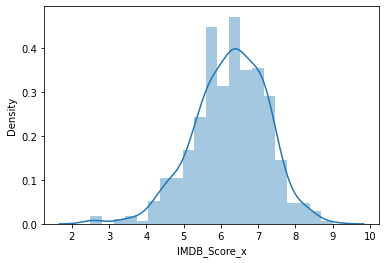

In [155]:
sns.distplot(df_total["IMDB_Score_x"])

Plote um gráfico de barras da quantidade de filmes por ano de lançamento utilizando:  sns.countplot(df_total['Release Date'])

<AxesSubplot:xlabel='Release Date', ylabel='count'>

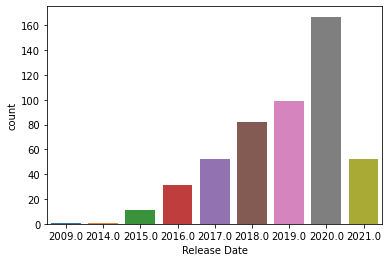

In [156]:
sns.countplot(df_total['Release Date'])

Faça uma lista dos 5 pricipais gêneros do dataframe. (Genre)

genre_list = [...,...,...]

In [162]:
genre_list = df_total["Genre_x"].head()
genre_list = genre_list.to_list()
genre_list

['Documentary',
 'Thriller',
 'Science fiction/Drama',
 'Horror thriller',
 'Mystery']

Plote o boxplot da duração dos filmes dos 5 principais gêneros.

1 - Utilize um dataframe auxiliar contendo apenas essas categorias a partir de um filtro:
df_top_genre = df_total[df_total['Genre'].isin(genre_list)]

2 - Utilize a função: sns.boxplot(x="Genre", y="Runtime", data=df_top_genre).

https://seaborn.pydata.org/generated/seaborn.boxplot.html

Acesse a galeria do seaborn e liste outros gráficos que seriam interessantes para visualizar os dados do dataframe df_total.

https://seaborn.pydata.org/examples/index.html

# Desenvolvimento do Case

**Lista de Perguntas**

**Utilize os comandos e conhecimentos aprendidos para plotar tabelas e gráficos que respondam às suas perguntas.**

**Nota:**: todo gráfico e tabela deve vir acompanhado de um comentário que explique as características observadas.

**Pode ser que alguma pergunta possa não ser respondida devido a ausência de dados. Quais outros dados fariam sentido para a análise porém estão inexistentes na  base?**
